In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_analises_original = pd.read_csv("data/dados_entrada_idh_estado.csv")
df_analises_original = df_analises_original.loc[:, ~df_analises_original.columns.str.contains('^Unnamed')] 
atlas_br = pd.read_excel("data/dados_idh_2019_atlas_brasil.xlsx")

df_px = pd.read_csv("data/dados_px_2025_processado.csv")
df_px = df_px.loc[:, ~df_px.columns.str.contains('^Unnamed')] 
#28s


In [45]:
atlas_br.columns = ['estado', 'Posicao_IDHM', 'IDHM', 'Posicao_IDHM_Renda',
       'IDHM_Renda', 'Posicao_IDHM_Educacao', 'IDHM_Educacao',
       'Posicao_IDHM_Longevidade', 'IDHM_Longevidade']

In [46]:
df_analise = df_analises_original.merge(atlas_br, how = 'left', on = ('estado'))

df_analise['renda'] = df_analise['renda']*1.3539
df_analise

,estado,P00901,P018,P035,P03201,N00101,renda,anos_estudo,Posicao_IDHM,IDHM,Posicao_IDHM_Renda,IDHM_Renda,Posicao_IDHM_Educacao,IDHM_Educacao,Posicao_IDHM_Longevidade,IDHM_Longevidade
0,Acre,3.748588,3.282403,1.154556,1.864959,2.160954,1936.454280,6.444712,17,0.739,21,0.668,16,0.728,13,0.830
1,Alagoas,4.016337,3.827324,1.364298,1.870901,2.262246,1546.147746,5.608455,27,0.687,26,0.636,26,0.643,21,0.793
2,Amapá,3.933227,3.720827,1.689949,1.817703,2.239335,1814.960175,6.919867,18,0.737,22,0.665,16,0.728,14,0.828
3,Amazonas,4.092107,3.574976,1.331450,1.871200,2.085123,1762.728917,6.784980,20,0.726,23,0.658,13,0.735,23,0.792
4,Bahia,4.080068,3.900775,1.481649,1.807879,2.281865,1702.967051,5.642560,21,0.718,19,0.673,24,0.672,17,0.818
5,Ceará,3.311669,3.953498,1.506315,1.859602,2.252431,1721.739110,6.088747,14,0.744,18,0.677,12,0.740,16,0.823
6,Distrito Federal,5.039976,4.579721,2.000296,1.813148,1.975582,4296.119788,8.966940,1,0.859,1,0.841,2,0.842,4,0.896
7,Espírito Santo,4.969262,3.786228,1.402282,1.825738,2.078004,2460.080529,7.261203,7,0.793,8,0.747,11,0.741,2,0.902
8,Goiás,4.910139,3.709091,1.358644,1.827141,2.074273,2344.234948,7.167282,11,0.774,11,0.729,7,0.770,15,0.827
9,Maranhão,3.304405,3.700798,1.310651,1.846407,2.288425,1262.817613,5.516609,26,0.694,27,0.614,20,0.704,27,0.773


In [47]:
df_analise_media = df_analise.groupby('estado').mean().round(2).reset_index()
df_analise_media

,estado,P00901,P018,P035,P03201,N00101,renda,anos_estudo,Posicao_IDHM,IDHM,Posicao_IDHM_Renda,IDHM_Renda,Posicao_IDHM_Educacao,IDHM_Educacao,Posicao_IDHM_Longevidade,IDHM_Longevidade
0,Acre,3.75,3.28,1.15,1.86,2.16,1936.45,6.44,17.0,0.74,21.0,0.67,16.0,0.73,13.0,0.83
1,Alagoas,4.02,3.83,1.36,1.87,2.26,1546.15,5.61,27.0,0.69,26.0,0.64,26.0,0.64,21.0,0.79
2,Amapá,3.93,3.72,1.69,1.82,2.24,1814.96,6.92,18.0,0.74,22.0,0.66,16.0,0.73,14.0,0.83
3,Amazonas,4.09,3.57,1.33,1.87,2.09,1762.73,6.78,20.0,0.73,23.0,0.66,13.0,0.74,23.0,0.79
4,Bahia,4.08,3.90,1.48,1.81,2.28,1702.97,5.64,21.0,0.72,19.0,0.67,24.0,0.67,17.0,0.82
5,Ceará,3.31,3.95,1.51,1.86,2.25,1721.74,6.09,14.0,0.74,18.0,0.68,12.0,0.74,16.0,0.82
6,Distrito Federal,5.04,4.58,2.00,1.81,1.98,4296.12,8.97,1.0,0.86,1.0,0.84,2.0,0.84,4.0,0.90
7,Espírito Santo,4.97,3.79,1.40,1.83,2.08,2460.08,7.26,7.0,0.79,8.0,0.75,11.0,0.74,2.0,0.90
8,Goiás,4.91,3.71,1.36,1.83,2.07,2344.23,7.17,11.0,0.77,11.0,0.73,7.0,0.77,15.0,0.83
9,Maranhão,3.30,3.70,1.31,1.85,2.29,1262.82,5.52,26.0,0.69,27.0,0.61,20.0,0.70,27.0,0.77


In [48]:
df_idh_estimado = df_analise[[ 'IDHM_Longevidade', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']]

import numpy as np
import pandas as pd

df_analises = df_idh_estimado.copy()

DATA = df_analises

# Separar as variáveis independentes (X) e dependente (y)
X = DATA.iloc[:, 1:].values  # Matriz de variáveis independentes
y = DATA.iloc[:, 0].values  # Vetor de variável dependente
X_obs = DATA.iloc[0, 1:].values  # Observação específica de X
y_obs = DATA.iloc[0, 0]  # Observação específica de y (para comparação)

# Passo 1: Estimar as médias
mu_X = np.mean(X, axis=0)  # Média de X (vetor)
mu_Y = np.mean(y)  # Média de y (escalar)

# Passo 2: Estimar a matriz de covariância
# Combinar X e y em uma matriz única para calcular a covariância conjunta
data_combined = np.column_stack((X, y))  # Combinação de X e y
cov_matrix = np.cov(data_combined, rowvar=False)  # Matriz de covariância conjunta

# Separar os blocos da matriz de covariância
num_features = X.shape[1]
Sigma_X = cov_matrix[:num_features, :num_features]  # Matriz de covariância de X
Sigma_Y = cov_matrix[num_features:, num_features:]  # Variância de y (escalar)
Sigma_YX = cov_matrix[num_features:, :num_features]  # Covariância entre y e X
Sigma_XY = Sigma_YX.T  # Covariância entre X e y

# Passo 3: Calcular a média condicional
# Fórmula: μ_Y|X = μ_Y + Σ_YX Σ_X⁻¹ (X_obs - μ_X)
Sigma_X_inv = np.linalg.inv(Sigma_X)  # Inversa da matriz de covariância de X
mu_Y_given_X = mu_Y + Sigma_YX @ Sigma_X_inv @ (X_obs - mu_X)

# Passo 4: Calcular a variância condicional
# Fórmula: Var(Y|X) = Σ_Y - Σ_YX Σ_X⁻¹ Σ_XY
var_Y_given_X = Sigma_Y - Sigma_YX @ Sigma_X_inv @ Sigma_XY

# Resultados
print("Longevidade")
print(f"Média condicional de y dado X_obs: {mu_Y_given_X}")
print(f"Variância condicional de y dado X_obs: {var_Y_given_X}")
print(f"Desvio condicional de y dado X_obs: {var_Y_given_X**0.5}")
print(f"Valor observado de y: {y_obs}")
print(f"Erro para 95% de nivel de confiança: {1.96 * var_Y_given_X**0.5} idhs" )

Longevidade
Média condicional de y dado X_obs: [0.79145123]
Variância condicional de y dado X_obs: [[0.00037485]]
Desvio condicional de y dado X_obs: [[0.01936099]]
Valor observado de y: 0.83
Erro para 95% de nivel de confiança: [[0.03794754]] idhs


In [49]:
df_idh_estimado = df_analise[[ 'IDHM_Educacao', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']]

import numpy as np
import pandas as pd

df_analises = df_idh_estimado.copy()

DATA = df_analises

# Separar as variáveis independentes (X) e dependente (y)
X = DATA.iloc[:, 1:].values  # Matriz de variáveis independentes
y = DATA.iloc[:, 0].values  # Vetor de variável dependente
X_obs = DATA.iloc[0, 1:].values  # Observação específica de X
y_obs = DATA.iloc[0, 0]  # Observação específica de y (para comparação)

# Passo 1: Estimar as médias
mu_X = np.mean(X, axis=0)  # Média de X (vetor)
mu_Y = np.mean(y)  # Média de y (escalar)

# Passo 2: Estimar a matriz de covariância
# Combinar X e y em uma matriz única para calcular a covariância conjunta
data_combined = np.column_stack((X, y))  # Combinação de X e y
cov_matrix = np.cov(data_combined, rowvar=False)  # Matriz de covariância conjunta

# Separar os blocos da matriz de covariância
num_features = X.shape[1]
Sigma_X = cov_matrix[:num_features, :num_features]  # Matriz de covariância de X
Sigma_Y = cov_matrix[num_features:, num_features:]  # Variância de y (escalar)
Sigma_YX = cov_matrix[num_features:, :num_features]  # Covariância entre y e X
Sigma_XY = Sigma_YX.T  # Covariância entre X e y

# Passo 3: Calcular a média condicional
# Fórmula: μ_Y|X = μ_Y + Σ_YX Σ_X⁻¹ (X_obs - μ_X)
Sigma_X_inv = np.linalg.inv(Sigma_X)  # Inversa da matriz de covariância de X
mu_Y_given_X = mu_Y + Sigma_YX @ Sigma_X_inv @ (X_obs - mu_X)

# Passo 4: Calcular a variância condicional
# Fórmula: Var(Y|X) = Σ_Y - Σ_YX Σ_X⁻¹ Σ_XY
var_Y_given_X = Sigma_Y - Sigma_YX @ Sigma_X_inv @ Sigma_XY

# Resultados
print('Educacao')
print(f"Média condicional de y dado X_obs: {mu_Y_given_X}")
print(f"Variância condicional de y dado X_obs: {var_Y_given_X}")
print(f"Desvio condicional de y dado X_obs: {var_Y_given_X**0.5}")
print(f"Valor observado de y: {y_obs}")
print(f"Erro para 95% de nivel de confiança: {1.96 * var_Y_given_X**0.5} idhs" )

Educacao
Média condicional de y dado X_obs: [0.72914428]
Variância condicional de y dado X_obs: [[0.00046518]]
Desvio condicional de y dado X_obs: [[0.021568]]
Valor observado de y: 0.728
Erro para 95% de nivel de confiança: [[0.04227327]] idhs


In [50]:
df_idh_estimado = df_analise[[ 'IDHM_Renda', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']]

import numpy as np
import pandas as pd

df_analises = df_idh_estimado.copy()

DATA = df_analises

# Separar as variáveis independentes (X) e dependente (y)
X = DATA.iloc[:, 1:].values  # Matriz de variáveis independentes
y = DATA.iloc[:, 0].values  # Vetor de variável dependente
X_obs = DATA.iloc[0, 1:].values  # Observação específica de X
y_obs = DATA.iloc[0, 0]  # Observação específica de y (para comparação)

# Passo 1: Estimar as médias
mu_X = np.mean(X, axis=0)  # Média de X (vetor)
mu_Y = np.mean(y)  # Média de y (escalar)

# Passo 2: Estimar a matriz de covariância
# Combinar X e y em uma matriz única para calcular a covariância conjunta
data_combined = np.column_stack((X, y))  # Combinação de X e y
cov_matrix = np.cov(data_combined, rowvar=False)  # Matriz de covariância conjunta

# Separar os blocos da matriz de covariância
num_features = X.shape[1]
Sigma_X = cov_matrix[:num_features, :num_features]  # Matriz de covariância de X
Sigma_Y = cov_matrix[num_features:, num_features:]  # Variância de y (escalar)
Sigma_YX = cov_matrix[num_features:, :num_features]  # Covariância entre y e X
Sigma_XY = Sigma_YX.T  # Covariância entre X e y

# Passo 3: Calcular a média condicional
# Fórmula: μ_Y|X = μ_Y + Σ_YX Σ_X⁻¹ (X_obs - μ_X)
Sigma_X_inv = np.linalg.inv(Sigma_X)  # Inversa da matriz de covariância de X
mu_Y_given_X = mu_Y + Sigma_YX @ Sigma_X_inv @ (X_obs - mu_X)

# Passo 4: Calcular a variância condicional
# Fórmula: Var(Y|X) = Σ_Y - Σ_YX Σ_X⁻¹ Σ_XY
var_Y_given_X = Sigma_Y - Sigma_YX @ Sigma_X_inv @ Sigma_XY

# Resultados
print('Renda')
print(f"Média condicional de y dado X_obs: {mu_Y_given_X}")
print(f"Variância condicional de y dado X_obs: {var_Y_given_X}")
print(f"Desvio condicional de y dado X_obs: {var_Y_given_X**0.5}")
print(f"Valor observado de y: {y_obs}")
print(f"Erro para 95% de nivel de confiança: {1.96 * var_Y_given_X**0.5} idhs" )

Renda
Média condicional de y dado X_obs: [0.67295533]
Variância condicional de y dado X_obs: [[9.10886832e-05]]
Desvio condicional de y dado X_obs: [[0.00954404]]
Valor observado de y: 0.668
Erro para 95% de nivel de confiança: [[0.01870632]] idhs


In [51]:
df_idh_estimado = df_analise[[ 'IDHM', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']]

import numpy as np
import pandas as pd

df_analises = df_idh_estimado.copy()

DATA = df_analises

# Separar as variáveis independentes (X) e dependente (y)
X = DATA.iloc[:, 1:].values  # Matriz de variáveis independentes
y = DATA.iloc[:, 0].values  # Vetor de variável dependente
X_obs = DATA.iloc[0, 1:].values  # Observação específica de X
y_obs = DATA.iloc[0, 0]  # Observação específica de y (para comparação)

# Passo 1: Estimar as médias
mu_X = np.mean(X, axis=0)  # Média de X (vetor)
mu_Y = np.mean(y)  # Média de y (escalar)

# Passo 2: Estimar a matriz de covariância
# Combinar X e y em uma matriz única para calcular a covariância conjunta
data_combined = np.column_stack((X, y))  # Combinação de X e y
cov_matrix = np.cov(data_combined, rowvar=False)  # Matriz de covariância conjunta

# Separar os blocos da matriz de covariância
num_features = X.shape[1]
Sigma_X = cov_matrix[:num_features, :num_features]  # Matriz de covariância de X
Sigma_Y = cov_matrix[num_features:, num_features:]  # Variância de y (escalar)
Sigma_YX = cov_matrix[num_features:, :num_features]  # Covariância entre y e X
Sigma_XY = Sigma_YX.T  # Covariância entre X e y

# Passo 3: Calcular a média condicional
# Fórmula: μ_Y|X = μ_Y + Σ_YX Σ_X⁻¹ (X_obs - μ_X)
Sigma_X_inv = np.linalg.inv(Sigma_X)  # Inversa da matriz de covariância de X
mu_Y_given_X = mu_Y + Sigma_YX @ Sigma_X_inv @ (X_obs - mu_X)

# Passo 4: Calcular a variância condicional
# Fórmula: Var(Y|X) = Σ_Y - Σ_YX Σ_X⁻¹ Σ_XY
var_Y_given_X = Sigma_Y - Sigma_YX @ Sigma_X_inv @ Sigma_XY

# Resultados
print('Geral')
print(f"Média condicional de y dado X_obs: {mu_Y_given_X}")
print(f"Variância condicional de y dado X_obs: {var_Y_given_X}")
print(f"Desvio condicional de y dado X_obs: {var_Y_given_X**0.5}")
print(f"Valor observado de y: {y_obs}")
print(f"Erro para 95% de nivel de confiança: {1.96 * var_Y_given_X**0.5} idhs" )

Geral
Média condicional de y dado X_obs: [0.72938379]
Variância condicional de y dado X_obs: [[0.00012966]]
Desvio condicional de y dado X_obs: [[0.01138664]]
Valor observado de y: 0.739
Erro para 95% de nivel de confiança: [[0.02231782]] idhs


In [52]:
import numpy as np
import pandas as pd

def prever_idhm_condicional(df_treino, df_estimativa):
    """
    Estima o valor condicional da variável 'IDHM_Longevidade' com base em uma regressão multivariada bayesiana (distribuição normal conjunta),
    usando como entrada dois DataFrames com as mesmas colunas.

    Parâmetros:
    - df_treino: DataFrame de treino contendo 'IDHM_Longevidade' como primeira coluna
    - df_estimativa: DataFrame de entrada para a previsão, com a mesma estrutura (mas 'IDHM_Longevidade' pode estar ausente ou ignorado)

    Retorna:
    - média condicional (float)
    - desvio padrão condicional (float)
    - erro para 95% de confiança (float)
    """
    # Garantir mesma estrutura
    df_treino = df_treino.copy()
    df_estimativa = df_estimativa.copy()

    X = df_treino.iloc[:, 1:].values  # Variáveis independentes
    y = df_treino.iloc[:, 0].values   # Variável dependente
    X_obs = df_estimativa.iloc[0, 1:].values  # Observação para estimar

    # Estimativas das médias
    mu_X = np.mean(X, axis=0)
    mu_Y = np.mean(y)

    # Matriz de covariância conjunta
    data_combined = np.column_stack((X, y))
    cov_matrix = np.cov(data_combined, rowvar=False)

    num_features = X.shape[1]
    Sigma_X = cov_matrix[:num_features, :num_features]
    Sigma_Y = cov_matrix[num_features:, num_features:]
    Sigma_YX = cov_matrix[num_features:, :num_features]
    Sigma_XY = Sigma_YX.T

    # Inversão de matriz e cálculo da média condicional
    Sigma_X_inv = np.linalg.inv(Sigma_X)
    mu_Y_given_X = mu_Y + Sigma_YX @ Sigma_X_inv @ (X_obs - mu_X)

    # Variância condicional
    var_Y_given_X = Sigma_Y - Sigma_YX @ Sigma_X_inv @ Sigma_XY
    std_Y_given_X = np.sqrt(var_Y_given_X).item()
    erro_95 = 1.96 * std_Y_given_X

    return mu_Y_given_X.item(), std_Y_given_X, erro_95


In [53]:
df_analise_media

,estado,P00901,P018,P035,P03201,N00101,renda,anos_estudo,Posicao_IDHM,IDHM,Posicao_IDHM_Renda,IDHM_Renda,Posicao_IDHM_Educacao,IDHM_Educacao,Posicao_IDHM_Longevidade,IDHM_Longevidade
0,Acre,3.75,3.28,1.15,1.86,2.16,1936.45,6.44,17.0,0.74,21.0,0.67,16.0,0.73,13.0,0.83
1,Alagoas,4.02,3.83,1.36,1.87,2.26,1546.15,5.61,27.0,0.69,26.0,0.64,26.0,0.64,21.0,0.79
2,Amapá,3.93,3.72,1.69,1.82,2.24,1814.96,6.92,18.0,0.74,22.0,0.66,16.0,0.73,14.0,0.83
3,Amazonas,4.09,3.57,1.33,1.87,2.09,1762.73,6.78,20.0,0.73,23.0,0.66,13.0,0.74,23.0,0.79
4,Bahia,4.08,3.90,1.48,1.81,2.28,1702.97,5.64,21.0,0.72,19.0,0.67,24.0,0.67,17.0,0.82
5,Ceará,3.31,3.95,1.51,1.86,2.25,1721.74,6.09,14.0,0.74,18.0,0.68,12.0,0.74,16.0,0.82
6,Distrito Federal,5.04,4.58,2.00,1.81,1.98,4296.12,8.97,1.0,0.86,1.0,0.84,2.0,0.84,4.0,0.90
7,Espírito Santo,4.97,3.79,1.40,1.83,2.08,2460.08,7.26,7.0,0.79,8.0,0.75,11.0,0.74,2.0,0.90
8,Goiás,4.91,3.71,1.36,1.83,2.07,2344.23,7.17,11.0,0.77,11.0,0.73,7.0,0.77,15.0,0.83
9,Maranhão,3.30,3.70,1.31,1.85,2.29,1262.82,5.52,26.0,0.69,27.0,0.61,20.0,0.70,27.0,0.77


In [54]:
resultados = []

for estado in df_analise_media['estado'].unique():
    df_estado = df_analise_media[df_analise_media['estado'] == estado]
    
    if df_estado.empty:
        continue
    
    # Adiciona coluna fictícia (zerada) para manter estrutura
    df_estado = df_estado.copy()
    df_estado['IDHM_Longevidade'] = 0

    # Seleciona a primeira linha do estado
    df_estimativa = df_estado[[ 'IDHM_Longevidade', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']].iloc[[0]]
    
    # Faz a previsão
    media, desvio, erro_95 = prever_idhm_condicional(df_analise_media[[ 'IDHM_Longevidade', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']], df_estimativa)
    
    resultados.append({
        'estado': estado,
        'idhm_longevidade_estimado': media,
        'desvio': desvio,
        'erro_95': erro_95
    })

# Transforma em DataFrame
df_resultados = pd.DataFrame(resultados)

# Visualização final
df_resultados

df_analise_media['idhm_longevidade_estimado'] = df_resultados['idhm_longevidade_estimado']
df_analise_media['erro_longevidade'] = df_resultados['erro_95']
df_analise_media

,estado,P00901,P018,P035,P03201,N00101,renda,anos_estudo,Posicao_IDHM,IDHM,Posicao_IDHM_Renda,IDHM_Renda,Posicao_IDHM_Educacao,IDHM_Educacao,Posicao_IDHM_Longevidade,IDHM_Longevidade,idhm_longevidade_estimado,erro_longevidade
0,Acre,3.75,3.28,1.15,1.86,2.16,1936.45,6.44,17.0,0.74,21.0,0.67,16.0,0.73,13.0,0.83,0.790016,0.037935
1,Alagoas,4.02,3.83,1.36,1.87,2.26,1546.15,5.61,27.0,0.69,26.0,0.64,26.0,0.64,21.0,0.79,0.801740,0.037935
2,Amapá,3.93,3.72,1.69,1.82,2.24,1814.96,6.92,18.0,0.74,22.0,0.66,16.0,0.73,14.0,0.83,0.813903,0.037935
3,Amazonas,4.09,3.57,1.33,1.87,2.09,1762.73,6.78,20.0,0.73,23.0,0.66,13.0,0.74,23.0,0.79,0.822703,0.037935
4,Bahia,4.08,3.90,1.48,1.81,2.28,1702.97,5.64,21.0,0.72,19.0,0.67,24.0,0.67,17.0,0.82,0.803376,0.037935
5,Ceará,3.31,3.95,1.51,1.86,2.25,1721.74,6.09,14.0,0.74,18.0,0.68,12.0,0.74,16.0,0.82,0.802694,0.037935
6,Distrito Federal,5.04,4.58,2.00,1.81,1.98,4296.12,8.97,1.0,0.86,1.0,0.84,2.0,0.84,4.0,0.90,0.922847,0.037935
7,Espírito Santo,4.97,3.79,1.40,1.83,2.08,2460.08,7.26,7.0,0.79,8.0,0.75,11.0,0.74,2.0,0.90,0.855155,0.037935
8,Goiás,4.91,3.71,1.36,1.83,2.07,2344.23,7.17,11.0,0.77,11.0,0.73,7.0,0.77,15.0,0.83,0.849976,0.037935
9,Maranhão,3.30,3.70,1.31,1.85,2.29,1262.82,5.52,26.0,0.69,27.0,0.61,20.0,0.70,27.0,0.77,0.779757,0.037935


In [55]:
resultados = []

for estado in df_analise_media['estado'].unique():
    df_estado = df_analise_media[df_analise_media['estado'] == estado]
    
    if df_estado.empty:
        continue
    
    # Adiciona coluna fictícia (zerada) para manter estrutura
    df_estado = df_estado.copy()
    df_estado['IDHM_Renda'] = 0

    # Seleciona a primeira linha do estado
    df_estimativa = df_estado[[ 'IDHM_Renda', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']].iloc[[0]]
    
    # Faz a previsão
    media, desvio, erro_95 = prever_idhm_condicional(df_analise_media[[ 'IDHM_Renda', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']], df_estimativa)
    
    resultados.append({
        'estado': estado,
        'idhm_renda_estimado': media,
        'desvio': desvio,
        'erro_95': erro_95
    })

# Transforma em DataFrame
df_resultados = pd.DataFrame(resultados)

# Visualização final
df_resultados

df_analise_media['idhm_renda_estimado'] = df_resultados['idhm_renda_estimado']
df_analise_media['erro_renda'] = df_resultados['erro_95']
df_analise_media

,estado,P00901,P018,P035,P03201,N00101,renda,anos_estudo,Posicao_IDHM,IDHM,Posicao_IDHM_Renda,IDHM_Renda,Posicao_IDHM_Educacao,IDHM_Educacao,Posicao_IDHM_Longevidade,IDHM_Longevidade,idhm_longevidade_estimado,erro_longevidade,idhm_renda_estimado,erro_renda
0,Acre,3.75,3.28,1.15,1.86,2.16,1936.45,6.44,17.0,0.74,21.0,0.67,16.0,0.73,13.0,0.83,0.790016,0.037935,0.675088,0.019259
1,Alagoas,4.02,3.83,1.36,1.87,2.26,1546.15,5.61,27.0,0.69,26.0,0.64,26.0,0.64,21.0,0.79,0.801740,0.037935,0.650907,0.019259
2,Amapá,3.93,3.72,1.69,1.82,2.24,1814.96,6.92,18.0,0.74,22.0,0.66,16.0,0.73,14.0,0.83,0.813903,0.037935,0.671570,0.019259
3,Amazonas,4.09,3.57,1.33,1.87,2.09,1762.73,6.78,20.0,0.73,23.0,0.66,13.0,0.74,23.0,0.79,0.822703,0.037935,0.671339,0.019259
4,Bahia,4.08,3.90,1.48,1.81,2.28,1702.97,5.64,21.0,0.72,19.0,0.67,24.0,0.67,17.0,0.82,0.803376,0.037935,0.665235,0.019259
5,Ceará,3.31,3.95,1.51,1.86,2.25,1721.74,6.09,14.0,0.74,18.0,0.68,12.0,0.74,16.0,0.82,0.802694,0.037935,0.653379,0.019259
6,Distrito Federal,5.04,4.58,2.00,1.81,1.98,4296.12,8.97,1.0,0.86,1.0,0.84,2.0,0.84,4.0,0.90,0.922847,0.037935,0.844652,0.019259
7,Espírito Santo,4.97,3.79,1.40,1.83,2.08,2460.08,7.26,7.0,0.79,8.0,0.75,11.0,0.74,2.0,0.90,0.855155,0.037935,0.731844,0.019259
8,Goiás,4.91,3.71,1.36,1.83,2.07,2344.23,7.17,11.0,0.77,11.0,0.73,7.0,0.77,15.0,0.83,0.849976,0.037935,0.723858,0.019259
9,Maranhão,3.30,3.70,1.31,1.85,2.29,1262.82,5.52,26.0,0.69,27.0,0.61,20.0,0.70,27.0,0.77,0.779757,0.037935,0.626400,0.019259


In [56]:
resultados = []

for estado in df_analise_media['estado'].unique():
    df_estado = df_analise_media[df_analise_media['estado'] == estado]
    
    if df_estado.empty:
        continue
    
    # Adiciona coluna fictícia (zerada) para manter estrutura
    df_estado = df_estado.copy()
    df_estado['IDHM_Educacao'] = 0

    # Seleciona a primeira linha do estado
    df_estimativa = df_estado[[ 'IDHM_Educacao', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']].iloc[[0]]
    
    # Faz a previsão
    media, desvio, erro_95 = prever_idhm_condicional(df_analise_media[[ 'IDHM_Educacao', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']], df_estimativa)
    
    resultados.append({
        'estado': estado,
        'idhm_educacao_estimado': media,
        'desvio': desvio,
        'erro_95': erro_95
    })

# Transforma em DataFrame
df_resultados = pd.DataFrame(resultados)

# Visualização final
df_resultados

df_analise_media['idhm_educacao_estimado'] = df_resultados['idhm_educacao_estimado']
df_analise_media['erro_educacao'] = df_resultados['erro_95']
df_analise_media

,estado,P00901,P018,P035,P03201,N00101,renda,anos_estudo,Posicao_IDHM,IDHM,Posicao_IDHM_Renda,IDHM_Renda,Posicao_IDHM_Educacao,IDHM_Educacao,Posicao_IDHM_Longevidade,IDHM_Longevidade,idhm_longevidade_estimado,erro_longevidade,idhm_renda_estimado,erro_renda,idhm_educacao_estimado,erro_educacao
0,Acre,3.75,3.28,1.15,1.86,2.16,1936.45,6.44,17.0,0.74,21.0,0.67,16.0,0.73,13.0,0.83,0.790016,0.037935,0.675088,0.019259,0.729647,0.041108
1,Alagoas,4.02,3.83,1.36,1.87,2.26,1546.15,5.61,27.0,0.69,26.0,0.64,26.0,0.64,21.0,0.79,0.801740,0.037935,0.650907,0.019259,0.681387,0.041108
2,Amapá,3.93,3.72,1.69,1.82,2.24,1814.96,6.92,18.0,0.74,22.0,0.66,16.0,0.73,14.0,0.83,0.813903,0.037935,0.671570,0.019259,0.743671,0.041108
3,Amazonas,4.09,3.57,1.33,1.87,2.09,1762.73,6.78,20.0,0.73,23.0,0.66,13.0,0.74,23.0,0.79,0.822703,0.037935,0.671339,0.019259,0.745198,0.041108
4,Bahia,4.08,3.90,1.48,1.81,2.28,1702.97,5.64,21.0,0.72,19.0,0.67,24.0,0.67,17.0,0.82,0.803376,0.037935,0.665235,0.019259,0.669580,0.041108
5,Ceará,3.31,3.95,1.51,1.86,2.25,1721.74,6.09,14.0,0.74,18.0,0.68,12.0,0.74,16.0,0.82,0.802694,0.037935,0.653379,0.019259,0.710131,0.041108
6,Distrito Federal,5.04,4.58,2.00,1.81,1.98,4296.12,8.97,1.0,0.86,1.0,0.84,2.0,0.84,4.0,0.90,0.922847,0.037935,0.844652,0.019259,0.843186,0.041108
7,Espírito Santo,4.97,3.79,1.40,1.83,2.08,2460.08,7.26,7.0,0.79,8.0,0.75,11.0,0.74,2.0,0.90,0.855155,0.037935,0.731844,0.019259,0.752319,0.041108
8,Goiás,4.91,3.71,1.36,1.83,2.07,2344.23,7.17,11.0,0.77,11.0,0.73,7.0,0.77,15.0,0.83,0.849976,0.037935,0.723858,0.019259,0.748643,0.041108
9,Maranhão,3.30,3.70,1.31,1.85,2.29,1262.82,5.52,26.0,0.69,27.0,0.61,20.0,0.70,27.0,0.77,0.779757,0.037935,0.626400,0.019259,0.676085,0.041108


In [57]:
resultados = []

for estado in df_analise_media['estado'].unique():
    df_estado = df_analise_media[df_analise_media['estado'] == estado]
    
    if df_estado.empty:
        continue
    
    # Adiciona coluna fictícia (zerada) para manter estrutura
    df_estado = df_estado.copy()
    df_estado['IDHM'] = 0

    # Seleciona a primeira linha do estado
    df_estimativa = df_estado[[ 'IDHM', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']].iloc[[0]]
    
    # Faz a previsão
    media, desvio, erro_95 = prever_idhm_condicional(df_analise_media[[ 'IDHM', 'P00901', 'P018', 'P035', 'P03201', 'N00101','renda', 'anos_estudo']], df_estimativa)
    
    resultados.append({
        'estado': estado,
        'idhm_estimado': media,
        'desvio': desvio,
        'erro_95': erro_95
    })

# Transforma em DataFrame
df_resultados = pd.DataFrame(resultados)

# Visualização final
df_resultados

df_analise_media['idhm_estimado'] = df_resultados['idhm_estimado']
df_analise_media['erro_idhm'] = df_resultados['erro_95']
df_analise_media

,estado,P00901,P018,P035,P03201,N00101,renda,anos_estudo,Posicao_IDHM,IDHM,Posicao_IDHM_Renda,IDHM_Renda,Posicao_IDHM_Educacao,IDHM_Educacao,Posicao_IDHM_Longevidade,IDHM_Longevidade,idhm_longevidade_estimado,erro_longevidade,idhm_renda_estimado,erro_renda,idhm_educacao_estimado,erro_educacao,idhm_estimado,erro_idhm
0,Acre,3.75,3.28,1.15,1.86,2.16,1936.45,6.44,17.0,0.74,21.0,0.67,16.0,0.73,13.0,0.83,0.790016,0.037935,0.675088,0.019259,0.729647,0.041108,0.730520,0.021838
1,Alagoas,4.02,3.83,1.36,1.87,2.26,1546.15,5.61,27.0,0.69,26.0,0.64,26.0,0.64,21.0,0.79,0.801740,0.037935,0.650907,0.019259,0.681387,0.041108,0.709587,0.021838
2,Amapá,3.93,3.72,1.69,1.82,2.24,1814.96,6.92,18.0,0.74,22.0,0.66,16.0,0.73,14.0,0.83,0.813903,0.037935,0.671570,0.019259,0.743671,0.041108,0.740255,0.021838
3,Amazonas,4.09,3.57,1.33,1.87,2.09,1762.73,6.78,20.0,0.73,23.0,0.66,13.0,0.74,23.0,0.79,0.822703,0.037935,0.671339,0.019259,0.745198,0.041108,0.743113,0.021838
4,Bahia,4.08,3.90,1.48,1.81,2.28,1702.97,5.64,21.0,0.72,19.0,0.67,24.0,0.67,17.0,0.82,0.803376,0.037935,0.665235,0.019259,0.669580,0.041108,0.710231,0.021838
5,Ceará,3.31,3.95,1.51,1.86,2.25,1721.74,6.09,14.0,0.74,18.0,0.68,12.0,0.74,16.0,0.82,0.802694,0.037935,0.653379,0.019259,0.710131,0.041108,0.718358,0.021838
6,Distrito Federal,5.04,4.58,2.00,1.81,1.98,4296.12,8.97,1.0,0.86,1.0,0.84,2.0,0.84,4.0,0.90,0.922847,0.037935,0.844652,0.019259,0.843186,0.041108,0.870487,0.021838
7,Espírito Santo,4.97,3.79,1.40,1.83,2.08,2460.08,7.26,7.0,0.79,8.0,0.75,11.0,0.74,2.0,0.90,0.855155,0.037935,0.731844,0.019259,0.752319,0.041108,0.778185,0.021838
8,Goiás,4.91,3.71,1.36,1.83,2.07,2344.23,7.17,11.0,0.77,11.0,0.73,7.0,0.77,15.0,0.83,0.849976,0.037935,0.723858,0.019259,0.748643,0.041108,0.772268,0.021838
9,Maranhão,3.30,3.70,1.31,1.85,2.29,1262.82,5.52,26.0,0.69,27.0,0.61,20.0,0.70,27.0,0.77,0.779757,0.037935,0.626400,0.019259,0.676085,0.041108,0.689979,0.021838


In [81]:
df_analise_media['idhm_calculado'] =  (df_analise_media.idhm_renda_estimado * df_analise_media.idhm_educacao_estimado * df_analise_media.idhm_estimado) **(1/3)
df_analise_media

,estado,P00901,P018,P035,P03201,N00101,renda,anos_estudo,Posicao_IDHM,IDHM,Posicao_IDHM_Renda,IDHM_Renda,Posicao_IDHM_Educacao,IDHM_Educacao,Posicao_IDHM_Longevidade,IDHM_Longevidade,idhm_longevidade_estimado,erro_longevidade,idhm_renda_estimado,erro_renda,idhm_educacao_estimado,erro_educacao,idhm_estimado,erro_idhm,idhm_calculado
0,Acre,3.75,3.28,1.15,1.86,2.16,1936.45,6.44,17.0,0.74,21.0,0.67,16.0,0.73,13.0,0.83,0.790016,0.037935,0.675088,0.019259,0.729647,0.041108,0.730520,0.021838,0.711271
1,Alagoas,4.02,3.83,1.36,1.87,2.26,1546.15,5.61,27.0,0.69,26.0,0.64,26.0,0.64,21.0,0.79,0.801740,0.037935,0.650907,0.019259,0.681387,0.041108,0.709587,0.021838,0.680205
2,Amapá,3.93,3.72,1.69,1.82,2.24,1814.96,6.92,18.0,0.74,22.0,0.66,16.0,0.73,14.0,0.83,0.813903,0.037935,0.671570,0.019259,0.743671,0.041108,0.740255,0.021838,0.717714
3,Amazonas,4.09,3.57,1.33,1.87,2.09,1762.73,6.78,20.0,0.73,23.0,0.66,13.0,0.74,23.0,0.79,0.822703,0.037935,0.671339,0.019259,0.745198,0.041108,0.743113,0.021838,0.719045
4,Bahia,4.08,3.90,1.48,1.81,2.28,1702.97,5.64,21.0,0.72,19.0,0.67,24.0,0.67,17.0,0.82,0.803376,0.037935,0.665235,0.019259,0.669580,0.041108,0.710231,0.021838,0.681385
5,Ceará,3.31,3.95,1.51,1.86,2.25,1721.74,6.09,14.0,0.74,18.0,0.68,12.0,0.74,16.0,0.82,0.802694,0.037935,0.653379,0.019259,0.710131,0.041108,0.718358,0.021838,0.693343
6,Distrito Federal,5.04,4.58,2.00,1.81,1.98,4296.12,8.97,1.0,0.86,1.0,0.84,2.0,0.84,4.0,0.90,0.922847,0.037935,0.844652,0.019259,0.843186,0.041108,0.870487,0.021838,0.852683
7,Espírito Santo,4.97,3.79,1.40,1.83,2.08,2460.08,7.26,7.0,0.79,8.0,0.75,11.0,0.74,2.0,0.90,0.855155,0.037935,0.731844,0.019259,0.752319,0.041108,0.778185,0.021838,0.753878
8,Goiás,4.91,3.71,1.36,1.83,2.07,2344.23,7.17,11.0,0.77,11.0,0.73,7.0,0.77,15.0,0.83,0.849976,0.037935,0.723858,0.019259,0.748643,0.041108,0.772268,0.021838,0.747995
9,Maranhão,3.30,3.70,1.31,1.85,2.29,1262.82,5.52,26.0,0.69,27.0,0.61,20.0,0.70,27.0,0.77,0.779757,0.037935,0.626400,0.019259,0.676085,0.041108,0.689979,0.021838,0.663585


In [58]:

def erro_raiz_cubica_produto(q, erro_rel_a, erro_rel_b, erro_rel_c):
   
    erro_rel_total = (1/3) * np.sqrt(
        erro_rel_a**2 + erro_rel_b**2 + erro_rel_c**2
    )
    erro_abs = q * erro_rel_total
    return erro_abs, erro_rel_total


q = (0.83*0.728*0.668)**(1/3)
erro_rel_a = 0.03794754
erro_rel_b = 0.04227327
erro_rel_c = 0.01870632

erro_abs, erro_rel = erro_raiz_cubica_produto(q, erro_rel_a, erro_rel_b, erro_rel_c)

print(f"Q = {q:.2f} ± {erro_abs:.2f}  (erro relativo: {erro_rel:.4f})")

Q = 0.74 ± 0.01  (erro relativo: 0.0199)


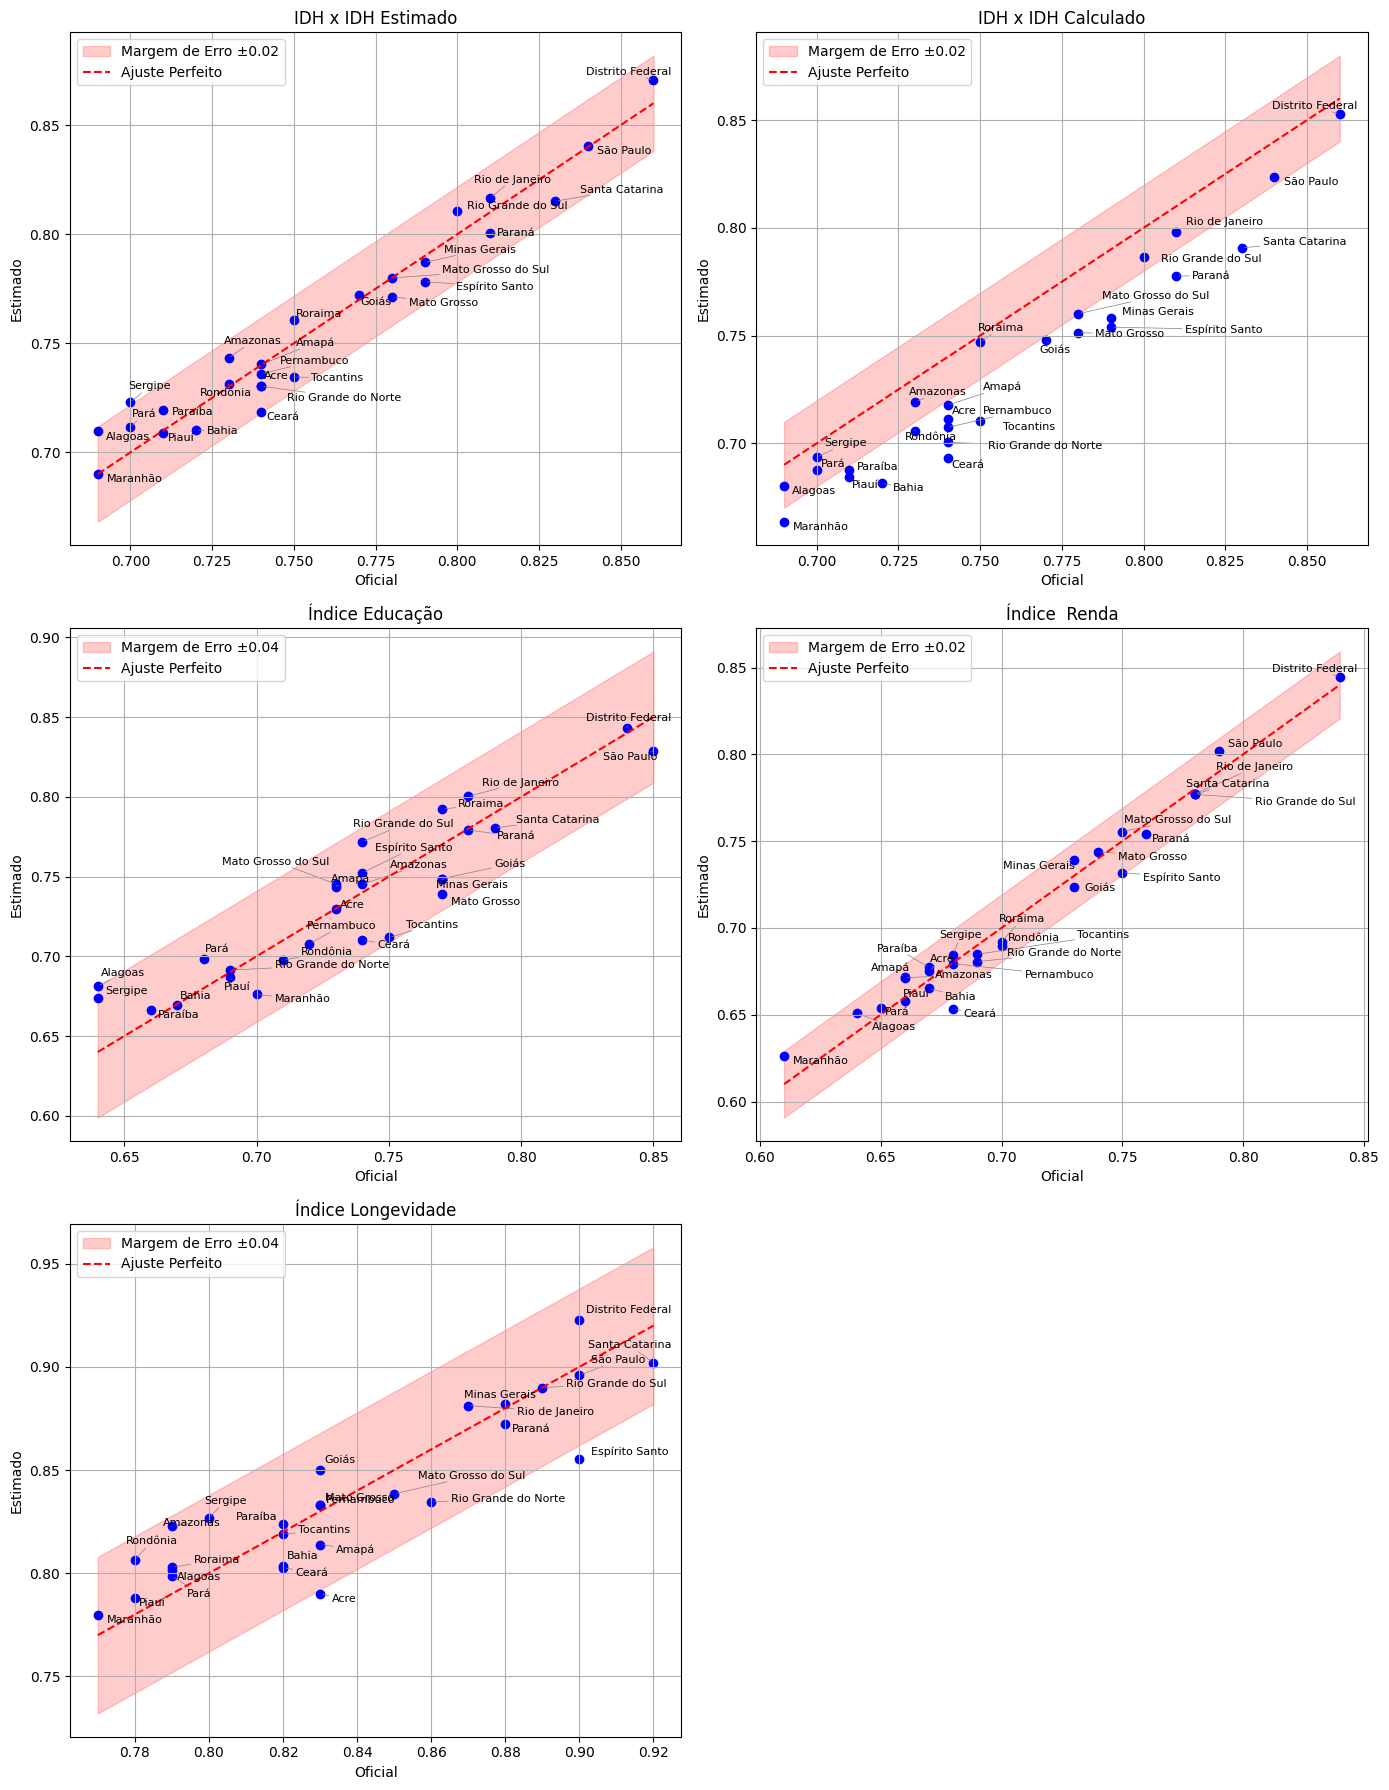

In [89]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np

df = df_analise_media.copy()
# Lista com as dimensões e respectivas colunas de erro
dimensoes = [
    ("IDHM", "idhm_estimado", "erro_idhm", "IDH x IDH Estimado"),
    ("IDHM", "idhm_calculado", 0.0199, "IDH x IDH Calculado"),
    ("IDHM_Educacao", "idhm_educacao_estimado", "erro_educacao", "Índice Educação"),
    ("IDHM_Renda", "idhm_renda_estimado", "erro_renda", "Índice  Renda"),
    ("IDHM_Longevidade", "idhm_longevidade_estimado", "erro_longevidade", "Índice Longevidade"),
]

# Criar figura com subplots 3 linhas x 2 colunas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for i, (col_real, col_pred, col_erro, titulo) in enumerate(dimensoes):
    ax = axes[i]

    # Ordenar valores para faixa de erro
    x = df[col_real].sort_values()
    y = df.loc[x.index, col_pred]
    
    # Tratar erro: constante (float) ou coluna
    if isinstance(col_erro, str):
        erro = df[col_erro].mean()
    else:
        erro = col_erro

    # Faixa de erro ± erro
    ax.fill_between(x, x - erro, x + erro, color='red', alpha=0.2, label=f"Margem de Erro ±{erro:.2f}")

    # Linha y = x
    ax.plot(x, x, 'r--', label="Ajuste Perfeito")

    # Pontos
    ax.scatter(df[col_real], df[col_pred], color='blue')

    # Estados
    texts = []
    for _, row in df.iterrows():
        texts.append(ax.text(row[col_real], row[col_pred], row['estado'], fontsize=8))
    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

    # Layout
    ax.set_title(titulo)
    ax.set_xlabel("Oficial")
    ax.set_ylabel("Estimado")
    ax.grid(True)
    ax.legend()

# Remover subplot vazio se número de gráficos for ímpar
if len(dimensoes) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


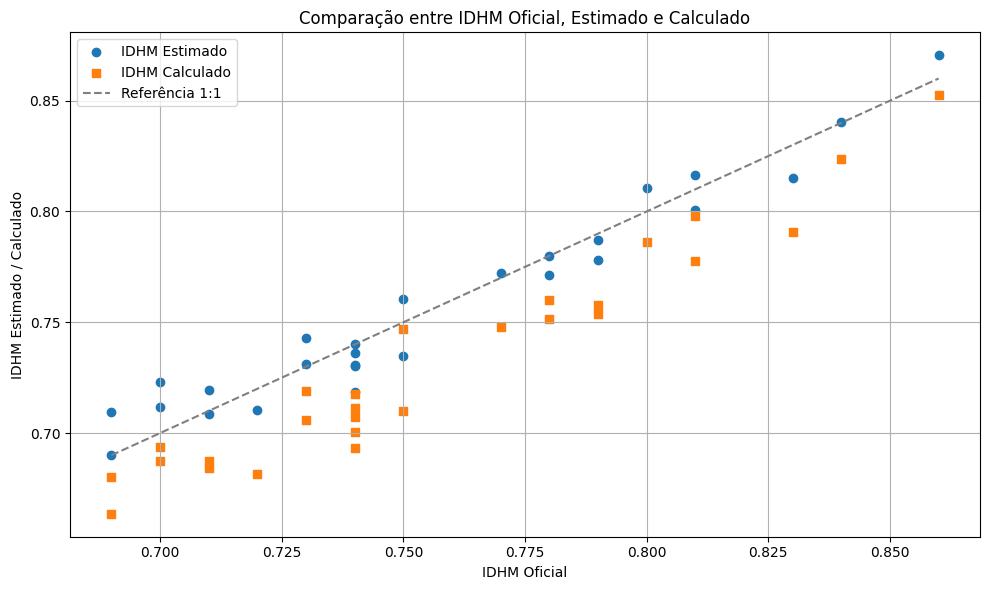

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_analise_media.copy()

plt.figure(figsize=(10, 6))

# Scatterplot - Estimado
plt.scatter(df['IDHM'], df['idhm_estimado'], label='IDHM Estimado', marker='o')

# Scatterplot - Calculado
plt.scatter(df['IDHM'], df['idhm_calculado'], label='IDHM Calculado', marker='s')

# Linha de referência 45º
plt.plot([df['IDHM'].min(), df['IDHM'].max()], 
         [df['IDHM'].min(), df['IDHM'].max()], 
         color='gray', linestyle='--', label='Referência 1:1')

plt.xlabel('IDHM Oficial')
plt.ylabel('IDHM Estimado / Calculado')
plt.title('Comparação entre IDHM Oficial, Estimado e Calculado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [96]:
import matplotlib.pyplot as plt
import numpy as np

def plot_residuos_multiplos(df, colunas, margens, titulos):
    fig, axes = plt.subplots(nrows=len(colunas), ncols=1, figsize=(14, 3.5 * len(colunas)))

    for i, (col_real, col_estimado) in enumerate(colunas):
        df_temp = df.copy()
        df_temp["residuo"] = df_temp[col_estimado] - df_temp[col_real]
        df_temp = df_temp.sort_values("residuo")

        estados = df_temp["estado"]
        residuos = df_temp["residuo"]
        margem_erro = margens[i]
        
        # Se for string, usa a média da coluna
        if isinstance(margem_erro, str):
            margem_erro = df[margem_erro].mean()

        ax = axes[i]

        # Faixa de erro
        ax.axhspan(-margem_erro, margem_erro, color='red', alpha=0.15, label=f"Margem de Erro ±{margem_erro:.3f}")

        # Linha 0
        ax.axhline(0, color='red', linestyle='--', label="Resíduo = 0")

        # Barras
        ax.bar(estados, residuos, color='royalblue', label="Resíduo")

        ax.set_title(titulos[i])
        ax.set_ylabel("Resíduo")
        ax.set_ylim(-0.05, 0.05)
        ax.set_xticks(range(len(estados)))
        ax.set_xticklabels(estados, rotation=45, ha='right')
        ax.grid(axis='y', linestyle='--', alpha=0.5)
        ax.legend()

    plt.tight_layout()
    plt.show()


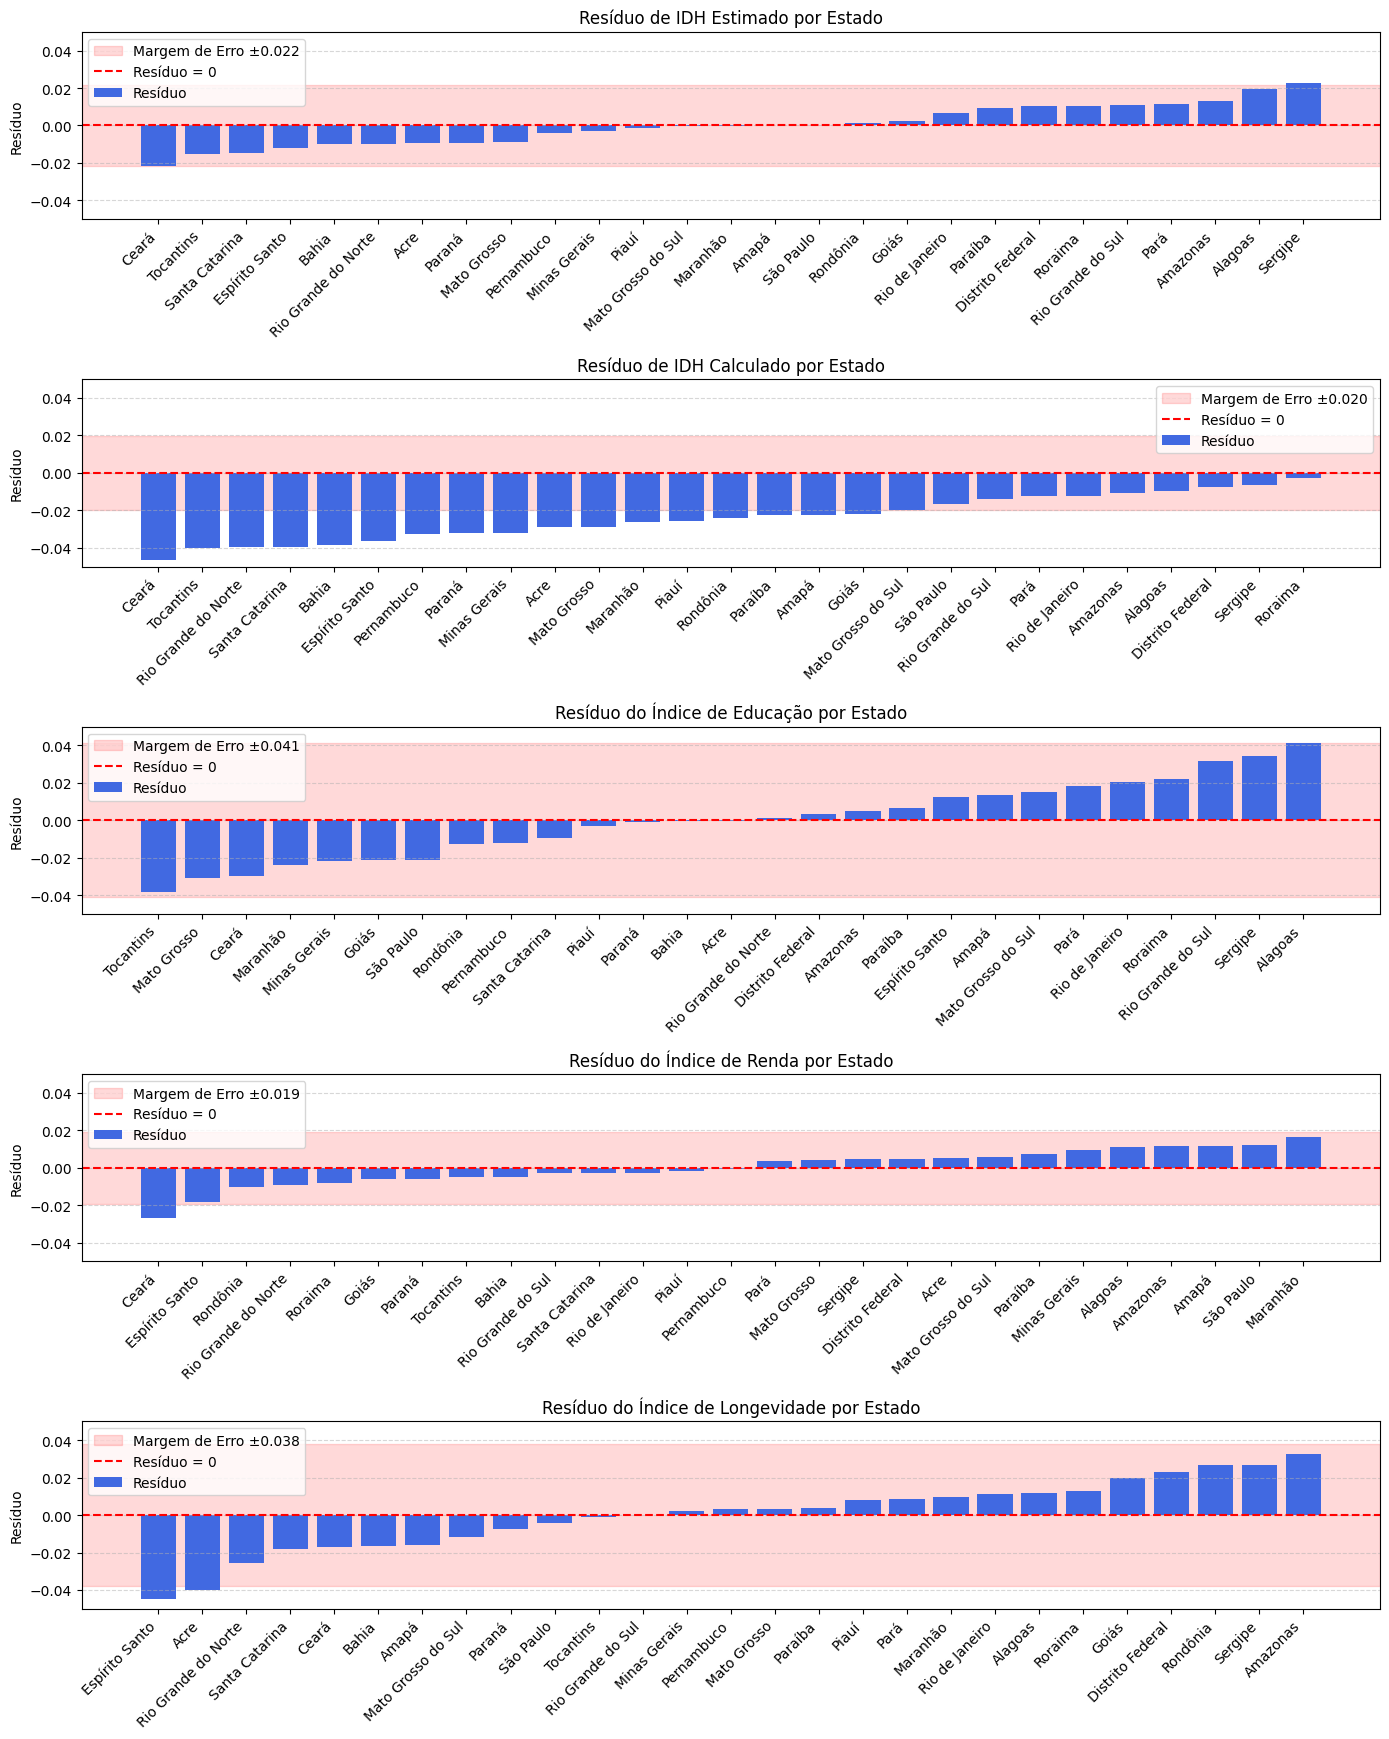

In [98]:
plot_residuos_multiplos(
    df,
    colunas=[
        ("IDHM", "idhm_estimado"),
        ("IDHM", "idhm_calculado"),
        ("IDHM_Educacao", "idhm_educacao_estimado"),
        ("IDHM_Renda", "idhm_renda_estimado"),
        ("IDHM_Longevidade", "idhm_longevidade_estimado"),
    ],
    margens=["erro_idhm", 0.0199, "erro_educacao", "erro_renda", "erro_longevidade"],
    titulos=[
        "Resíduo de IDH Estimado por Estado",
        "Resíduo de IDH Calculado por Estado",
        "Resíduo do Índice de Educação por Estado",
        "Resíduo do Índice de Renda por Estado",
        "Resíduo do Índice de Longevidade por Estado"
    ]
)
